<a href="https://colab.research.google.com/github/Edwin1719/Clustering_Clientes/blob/main/La_Esencia_del_Cliente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **REVELANDO LA ESENCIA DEL CLIENTE**
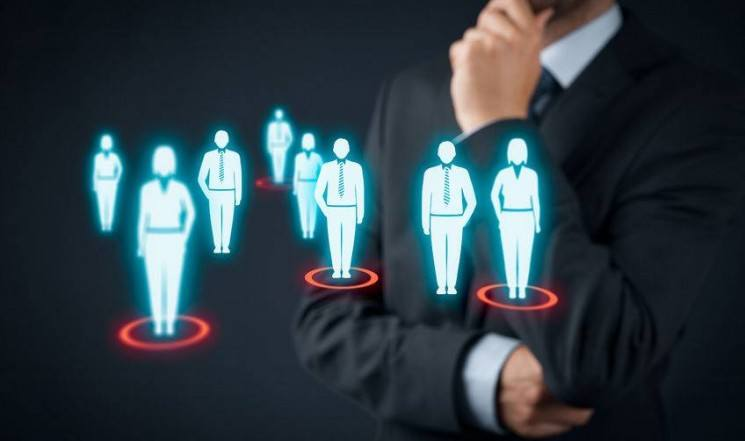
---








# **PREPARANDO EL ENTORNO DE TRABAJO**

In [1]:
# Conectando con Goolge Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Instalacion de Librerias Principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# **OBTENCION DE LOS DATOS**

In [3]:
# Lectura del archivo csv alojado en el drive
datos = pd.read_csv("/content/drive/MyDrive/media prediction and its cost.csv")
df = pd.DataFrame(datos)

In [4]:
# caracteristicas del DataFrame
df.shape

(60428, 40)

In [5]:
df.sample(3)

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
36412,Meat,Deli,Food,14.24,4.9840,4.0,Save-It Sale,USA,M,F,...,14210.0,5633.0,3755.0,0.0,0.0,0.0,0.0,1.0,Daily Paper,81.79
43920,Vegetables,Frozen Foods,Food,4.05,1.6200,3.0,Shelf Clearing Days,USA,S,F,...,16232.0,2452.0,1635.0,0.0,0.0,0.0,0.0,0.0,"Daily Paper, Radio",76.41
43634,Vegetables,Frozen Foods,Food,4.29,1.8447,3.0,Cash Register Lottery,USA,S,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86


In [6]:
# Listado de columnas categoricas
df.select_dtypes(include=['object']).head(3)

,food_category,food_department,food_family,promotion_name,sales_country,marital_status,gender,education,member_card,occupation,houseowner,avg. yearly_income,brand_name,store_type,store_city,store_state,media_type
0,Breakfast Foods,Frozen Foods,Food,Bag Stuffers,USA,M,F,Partial High School,Normal,Skilled Manual,Y,$10K - $30K,Carrington,Deluxe Supermarket,Salem,OR,"Daily Paper, Radio"
1,Breakfast Foods,Frozen Foods,Food,Cash Register Lottery,USA,M,M,Bachelors Degree,Silver,Professional,Y,$50K - $70K,Carrington,Deluxe Supermarket,Salem,OR,"Daily Paper, Radio"
2,Breakfast Foods,Frozen Foods,Food,High Roller Savings,USA,S,F,Partial High School,Normal,Manual,N,$10K - $30K,Carrington,Deluxe Supermarket,Salem,OR,"Daily Paper, Radio"


In [7]:
# Listado de columnas categoricas
df.select_dtypes(include=['float']).head(3)

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,7.36,2.7232,4.0,1.0,1.0,1.0,1.0,1.84,19.7,17.7,...,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,126.62
1,5.52,2.5944,3.0,0.0,4.0,0.0,4.0,1.84,19.7,17.7,...,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,59.86
2,3.68,1.3616,2.0,4.0,1.0,0.0,1.0,1.84,19.7,17.7,...,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,84.16


In [8]:
# Diccionario con las nuevas columnas en español
Colunmas_nuevas = {
    'food_category': 'categoria_alimento','food_department': 'departamento','food_family': 'tipo', 'store_sales(in millions)': 'ventas_tienda(en millones)',
    'store_cost(in millions)': 'costo_tienda(en millones)', 'unit_sales(in millions)': 'ventas_unitarias(en millones)', 'promotion_name': 'promocion','sales_country': 'pais',
    'marital_status': 'estado_civil','gender': 'genero','total_children': 'total_de_hijos','education': 'escolaridad','member_card': 'miembro','occupation': 'ocupacion',
    'houseowner': 'vivienda_propia','avg_cars_at home(approx)': 'promedio_autos(aprox)','avg. yearly_income': 'ingreso_anual','num_children_at_home': 'numero_hijos',
    'avg_cars_at home(approx).1': 'promedio_autos(aprox)','brand_name': 'marca','SRP': 'precio_recomendado','gross_weight': 'peso_bruto','net_weight': 'peso_neto',
    'recyclable_package': 'empaque_reciclable','low_fat': 'bajo_en_grasa','units_per_case': 'unidades_por_caja', 'store_type': 'comercio','store_city': 'ciudad',
    'store_state': 'estado','store_sqft': 'pies_cuadrados_tienda','grocery_sqft': 'pies_cuadrados_comestibles','frozen_sqft': 'pies_cuadrados_congelados','meat_sqft': 'pies_cuadrados_carne',
    'coffee_bar': 'cafeteria','video_store': 'tienda_de_videos','salad_bar': 'barra_de_ensaladas', 'prepared_food': 'comida_preparada', 'florist': 'floristeria', 'media_type': 'divulgacion','cost': 'costo'
}

In [9]:
# Cambiando nombres de las columnas
df.rename(columns=Colunmas_nuevas, inplace=True)

In [10]:
df.head(3)

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,...,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16


In [11]:
# Diccionarios de las columnas categoricas

categoria_alimento = {'Vegetables': 'Vegetales','Snack Foods': 'Alimentos para picar','Dairy': 'Productos lácteos','Meat': 'Carne','Fruit': 'Fruta','Jams and Jellies': 'Mermeladas y jaleas',
            'Baking Goods': 'Productos para hornear','Breakfast Foods': 'Alimentos para el desayuno','Bread': 'Pan','Canned Soup': 'Sopa enlatada','Beer and Wine': 'Cerveza y vino',
            'Paper Products': 'Productos de papel','Bathroom Products': 'Productos de baño','Electrical': 'Eléctrico','Candy': 'Dulces','Frozen Desserts': 'Postres congelados',
            'Specialty': 'Especialidades','Starchy Foods': 'Alimentos ricos en almidón','Magazines': 'Revistas','Kitchen Products': 'Productos de cocina','Eggs': 'Huevos',
            'Hot Beverages': 'Bebidas calientes','Hygiene': 'Higiene','Pain Relievers': 'Analgésicos','Pizza': 'Pizza','Carbonated Beverages': 'Bebidas carbonatadas',
            'Pure Juice Beverages': 'Bebidas de jugo puro','Cleaning Supplies': 'Suministros de limpieza','Side Dishes': 'Acompañamientos','Frozen Entrees': 'Platos preparados congelados',
            'Drinks': 'Bebidas','Plastic Products': 'Productos de plástico','Hardware': 'Artículos de ferretería','Cold Remedies': 'Remedios para el resfriado','Decongestants': 'Descongestionantes','Canned Tuna': 'Atún enlatado',
            'Seafood': 'Mariscos','Canned Anchovies': 'Anchoas enlatadas','Canned Clams': 'Almejas enlatadas','Candles': 'Velas','Miscellaneous': 'Misceláneos',
            'Canned Oysters': 'Ostras enlatadas','Canned Shrimp': 'Camarones enlatados','Packaged Vegetables': 'Vegetales envasados','Canned Sardines': 'Sardinas enlatadas'}
departamento = {'Produce': 'Productos frescos','Snack Foods': 'Alimentos para picar','Household': 'Artículos para el hogar','Frozen Foods': 'Alimentos congelados',
            'Baking Goods': 'Productos para hornear','Canned Foods': 'Alimentos enlatados','Dairy': 'Productos lácteos','Health and Hygiene': 'Salud e higiene',
            'Beverages': 'Bebidas','Deli': 'Charcutería','Baked Goods': 'Productos horneados','Alcoholic Beverages': 'Bebidas alcohólicas','Snacks': 'Snacks',
            'Starchy Foods': 'Alimentos ricos en almidón','Periodicals': 'Publicaciones periódicas','Eggs': 'Huevos','Breakfast Foods': 'Alimentos para el desayuno',
            'Canned Products': 'Productos enlatados','Checkout': 'Caja de salida','Meat': 'Carne','Seafood': 'Mariscos','Carousel': 'Carrusel'}

tipo = {'Food':'Comida','Non-Consumable':'No comestible', 'Drink':'Bebida'}

promocion = {'Weekend Markdown': 'Descuento de fin de semana','Two Day Sale': 'Venta de dos días','Price Savers': 'Ahorro de precios','Price Winners': 'Ganadores de precios',
            'Save-It Sale': 'Venta Ahorra Ya','Super Duper Savers': 'Super Ahorradores','Super Savers': 'Super Ahorro','One Day Sale': 'Venta de un día','Double Down Sale': 'Venta Doble',
            'High Roller Savings': 'Ahorro para apostadores grandes','Green Light Days': 'Días de luz verde','Shelf Clearing Days': 'Días de liquidación de estanterías',
            'Price Slashers': 'Rebajadores de precios','Free For All': 'Gratis para todos','Cash Register Lottery': 'Lotería de la caja registradora','Go For It': 'Adelante',
            'Two for One': 'Dos por uno','Money Savers': 'Ahorradores de dinero','Big Time Discounts': 'Descuentos de gran magnitud','Price Destroyers': 'Destructores de precios',
            'Saving Days': 'Días de ahorro','Dollar Cutters': 'Recortadores de dólares','Unbeatable Price Savers': 'Ahorro de precios imbatible','Sales Galore': 'Promociones por montones',
            'Big Promo': 'Gran promoción','Dimes Off': 'Más barato','Sales Days': 'Días de venta','Price Cutters': 'Rebajando precios','You Save Days': 'Días de ahorro',
            'Savings Galore': 'Ahorros por montones','Bag Stuffers': 'Bolsas llenas','Three for One': 'Tres por uno','I Cant Believe It Sale': 'Venta No Puedo Creerlo',
            'Sale Winners': 'Ganadores de ventas','Pick Your Savings': 'Elige tus ahorros','Bye Bye Baby': 'Adiós bebé','Best Savings': 'Mejores ahorros','Tip Top Savings': 'Ahorro de primera clase',
            'Shelf Emptiers': 'Estantes vacíos','Big Time Savings': 'Ahorro Enorme','Wallet Savers': 'Ahorradores de billetera','Dollar Days': 'Días de dólar','Mystery Sale': 'Venta misteriosa',
            'Price Smashers': 'Aplastadores de precios','Green Light Special': 'Especial luz verde','Coupon Spectacular': 'Espectacular de cupones',
            'Super Wallet Savers': 'Super ahorradores de billetera','Double Your Savings': 'Duplica tus ahorros','Fantastic Discounts': 'Descuentos fantásticos'}

escolaridad = {'Partial High School':'Primaria', 'High School Degree':'Secundaria', 'Bachelors Degree':'Superior', 'Partial College':'Técnico', 'Graduate Degree':'Maestría'}

miembro = {'Bronze':'Bronce', 'Golden': 'Oro', 'Silver':'Plata'}

ocupacion = {'Professional':'Profesional', 'Skilled Manual':'Técnico', 'Manual':'Obrero', 'Management':'Gestión', 'Clerical':'Cargo de Oficina'}

pais = {'USA':'Estados Unidos', 'Mexico':'México', 'Canada':'Canadá'}

estado_civil = {'S':'Soltero', 'M':'Casado'}

genero = {'F':'Femenino', 'M':'Masculino'}

vivienda_propia = {'Y':'Sí', 'N':'No'}

ingreso_anual = {'$30K - $50K':40000, '$10K - $30K':20000, '$50K - $70K':60000, '$70K - $90K':80000, '$130K - $150K':140000, '$90K - $110K':100000, '$110K - $130K':120000, '$150K +':160000}

comercio = {'Supermarket': 'Supermercado','Deluxe Supermarket': 'Supermercado de lujo','Gourmet Supermarket': 'Supermercado gourmet','Mid-Size Grocery': 'Supermercado mediano','Small Grocery': 'Pequeño supermercado'}

divulgacion = {'Daily Paper, Radio': 'Periódico diario, radio','Product Attachment': 'Anexo del producto','Daily Paper, Radio, TV': 'Periódico diario, radio, televisión','Daily Paper': 'Periódico diario',
              'Street Handout': 'Panfletos','Radio': 'Radio','Sunday Paper': 'Periódico dominical','In-Store Coupon': 'Cupón en la tienda','Sunday Paper, Radio': 'Periódico dominical, radio',
              'Cash Register Handout': 'Entrega en el punto de venta','TV': 'Televisión','Bulk Mail': 'Correo masivo','Sunday Paper, Radio, TV': 'Periódico dominical, radio, televisión'}


In [12]:
# Mapeo valores de las columnas 'categoricas'
df['categoria_alimento'] = df['categoria_alimento'].map(categoria_alimento)
df['departamento'] = df['departamento'].map(departamento)
df['tipo'] = df['tipo'].map(tipo)
df['promocion'] = df['promocion'].map(promocion)
df['escolaridad'] = df['escolaridad'].map(escolaridad)
df['miembro'] = df['miembro'].map(miembro)
df['ocupacion'] = df['ocupacion'].map(ocupacion)
df['pais'] = df['pais'].map(pais)
df['estado_civil'] = df['estado_civil'].map(estado_civil)
df['genero'] = df['genero'].map(genero)
df['vivienda_propia'] = df['vivienda_propia'].map(vivienda_propia)
df['ingreso_anual'] = df['ingreso_anual'].map(ingreso_anual)
df['comercio'] = df['comercio'].map(comercio)
df['divulgacion'] = df['divulgacion'].map(divulgacion)

In [13]:
df.head(3)

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,...,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,4.0,Bolsas llenas,Estados Unidos,Casado,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",126.62
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,2.5944,3.0,Lotería de la caja registradora,Estados Unidos,Casado,Masculino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",59.86
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.3616,2.0,Ahorro para apostadores grandes,Estados Unidos,Soltero,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",84.16


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   categoria_alimento             60428 non-null  object 
 1   departamento                   60428 non-null  object 
 2   tipo                           60428 non-null  object 
 3   ventas_tienda(en millones)     60428 non-null  float64
 4   costo_tienda(en millones)      60428 non-null  float64
 5   ventas_unitarias(en millones)  60428 non-null  float64
 6   promocion                      60428 non-null  object 
 7   pais                           60428 non-null  object 
 8   estado_civil                   60428 non-null  object 
 9   genero                         60428 non-null  object 
 10  total_de_hijos                 60428 non-null  float64
 11  escolaridad                    60428 non-null  object 
 12  miembro                        46561 non-null 

In [15]:
df.ingreso_anual.value_counts()

ingreso_anual
40000     19514
20000     12959
60000     10493
80000      7544
140000     3410
100000     2737
120000     2590
160000     1181
Name: count, dtype: int64

In [16]:
import random
forty = random.sample(range(30000,50000),19514)
Twenty = random.sample(range(10000,30000),12959)
sixty = random.sample(range(50000,70000),10493)
eigth = random.sample(range(70000,90000),7544)
hundredforty = random.sample(range(130000,150000),3410)
hundred = random.sample(range(90000,110000),2737)
hundredtwenty = random.sample(range(110000,130000),2590)
hundredplus = random.sample(range(150000,300000),1181)

In [17]:
numeros = Twenty+forty+sixty+eigth+hundred+hundredtwenty+hundredforty+hundredplus
len(numeros)

60428

In [18]:
df = df.sort_values("ingreso_anual")
df["ingreso_real"] = numeros
df [["ingreso_anual","ingreso_real"]][53300:53325]

,ingreso_anual,ingreso_real
30357,120000,116113
32184,120000,114031
20845,120000,119203
38171,120000,121807
32156,120000,125562
4782,120000,112967
59311,120000,117534
59940,120000,116485
37822,120000,116057
7008,120000,124406


In [19]:
# Exportando el DataFrame traduciso a un archivo CSV
df.to_csv('mi_dataframe.csv', index=False)

# Guardado del DataFrame en Google Drive
df.to_csv('/content/drive/My Drive/mi_dataframe.csv', index=False)

# **EXPLORACION DE DATOS Y PREPROCESAMIENTO**

## **Distribuicion de Ventas por Categoria**

In [20]:
# Funcion de Exploracion de datos
def plot_Ventas (pais,datos):
  plt.figure(figsize=(10,4))
  grafico = sb.countplot(x=pais,data=df,orient="h")
  grafico.set_ylabel("Cant_Ventas",fontsize=16)

  sizes = []
  for p in grafico.patches:
    height = p.get_height()
    sizes.append(height)
    grafico.text(p.get_x() + p.get_width()/1.6, height+200, f"{round(height/len(datos)*100,2)}%",ha="center",va="bottom", fontsize=12)

  grafico.set_ylim(0,max(sizes)*1.1)


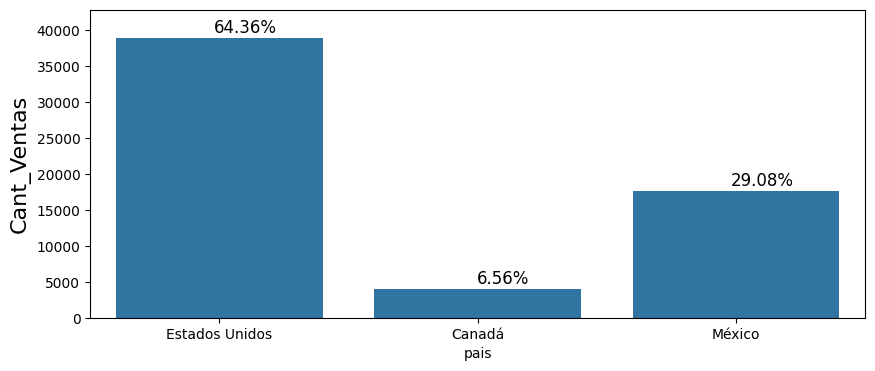

In [21]:
plot_Ventas("pais",df)
### Existe Una dominancia en las ventas del Pais Estados Unidos con un 64.36% de las ventas en Tiendas seguido por
### el 29.8% de Mexico y un 6.56% de Canada

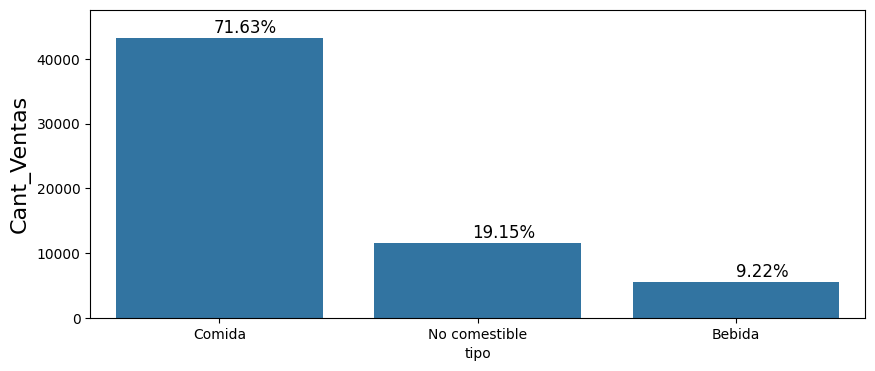

In [22]:
plot_Ventas("tipo",df)
### Existe Una dominancia en ventas por Tipo de producto en Comida con un con un 71.63%
### seguido por el 19.15% de no comestibles y tan solo un 9.22% en Bebidas

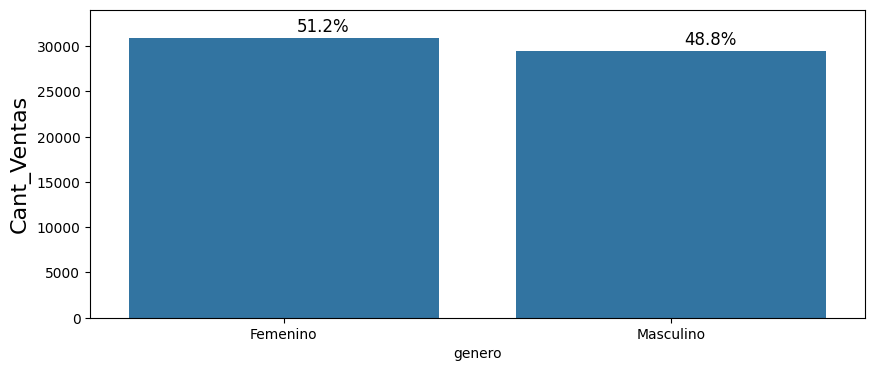

In [23]:
plot_Ventas("genero",df)
### Se observa un Equilibrio en las Ventas por Genero con un 51.2% para el genero Femenino y un 48.8% para el Masculino

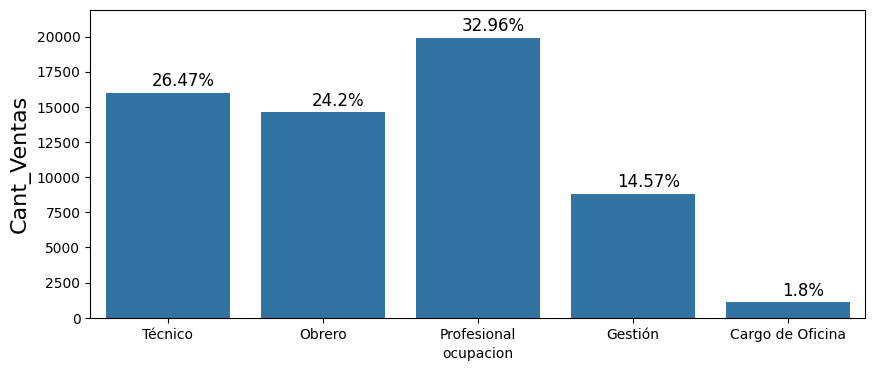

In [24]:
plot_Ventas("ocupacion",df)
## Existe notable distribucion en la ventas por ocupacion donde el mayor porcentaje corresponde a las personas profesionales,
## con el 32.96% que probablemente perciban mejores ingresos, seguido por un 26.47% para personal tecnico y un 24,2% para
## obreros que probablemente corresponda a un volumen mas alto de personas y un 16.3% para personal de Gestion y oficina

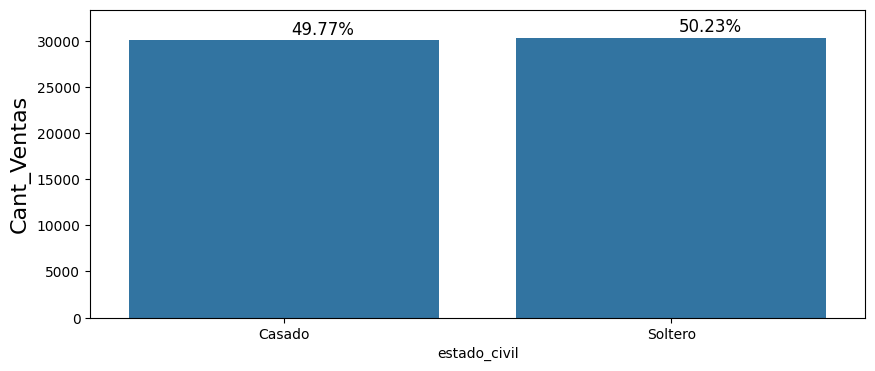

In [25]:
plot_Ventas("estado_civil",df)
### Se observa Equilibrio en Ventas por Estado civil con un 49.77% para Casados y un 50.23% para personas Solteras

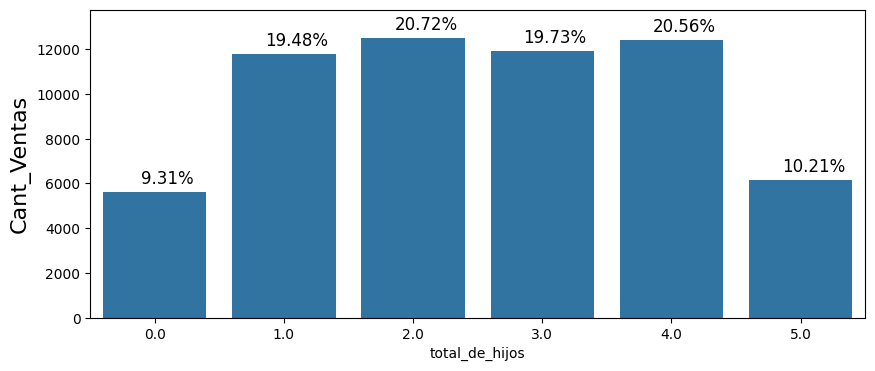

In [26]:
plot_Ventas("total_de_hijos",df)
## Se Observa una notable reduccion en las ventas para personas sin Hijos con solo un 9.31% de las ventas en tienda
## y un particular porcentaje para personas con 5 hijos de tan solo el 10.21% de las ventas que probablemente corresponda
## a personas de un bajo nivel socioeconomico entre otras razones

## **Distribucion de Ingresos por Categoria**

In [27]:
# Definiendo la funcion del Histograma
def histograma_var(df, ventas_col, categorical_var):

    # Crear la figura
    plt.figure(figsize=(9, 4))

    # Crear el histograma desglosado por la variable categórica
    sb.histplot(data=df, x=ventas_col, hue=categorical_var, multiple='stack',bins=10)
    plt.title(f'Distribución de Ingresos {categorical_var.capitalize()}')
    plt.xlabel('ingresos_anuales')
    plt.ylabel('Frecuencia')

    # Mostrar el gráfico
    plt.show()


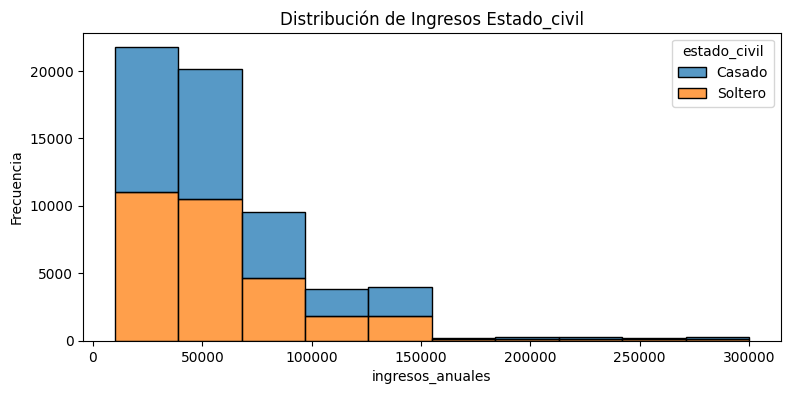

In [28]:
# Histograma de Ingresos por estado civil
histograma_var(df, 'ingreso_real', 'estado_civil')
## La distribucion de los Ingresos por Estado civil Muestra a las personas Casadas percibiendo una mayor cantidad de
## ingresos que las personas solteras para los distintos rangos salariales del Dataframe

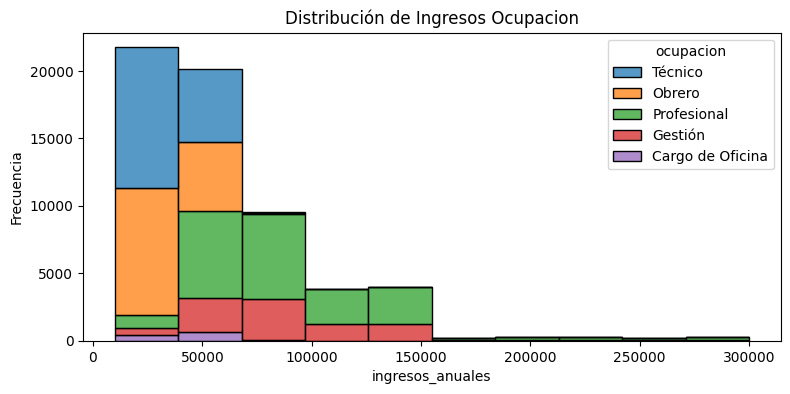

In [29]:
# Histograma de Ingresos por ocupacion
histograma_var(df, 'ingreso_real', 'ocupacion')
## Los Ingresos por Ocupacion Muestra a los Tecnicos y Obreros con una mayor frecuencia de compra pero con rangos salariales
## mucho mas bajos que los profesionales y el personal de Gestion que pueden llegar hasta los 150 mil o mas por año

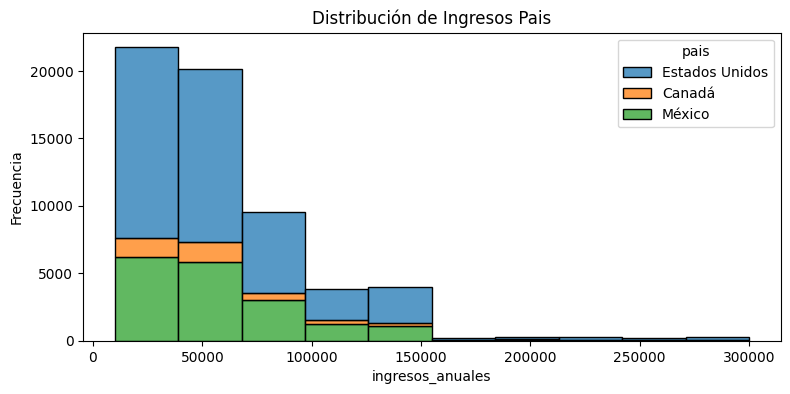

In [30]:
# Histograma de Ingresos por pais
histograma_var(df, 'ingreso_real', 'pais')
## Los Ingresos por pais indican que Estados Unidos posee una alta frecuencia de personas y de rango salarial mayor
## Seguidos por Canada y Mexico con una frecuencia notablemente mas baja.

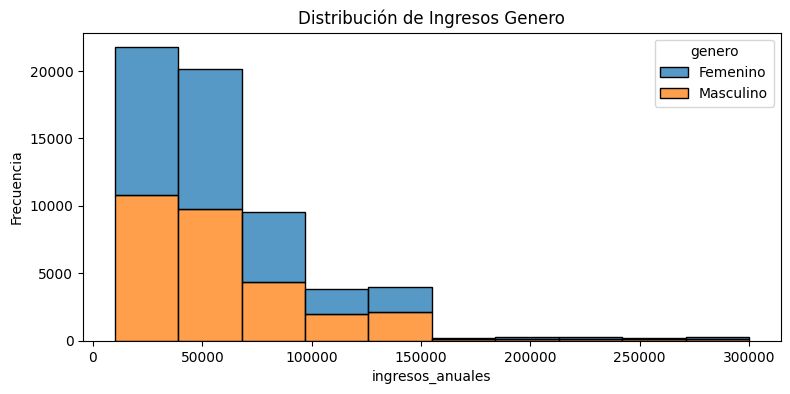

In [31]:
# Histograma de Ingresos por genero
histograma_var(df, 'ingreso_real', 'genero')
## Los Ingresos por genero no enseña Un DataFrame con una alta frecuencia del genero femenino en tiendas y con
## rango salarial notablemente mayor que la del genero masculino.

# **DEFINICION DE VARIABLES Y ESTANDARIZACION DE DATOS**

## **Definicion de las variables de Clasificacion**

In [32]:
## VARIABLES PARA EL ANALISIS (Pais, escolaridad, ocupacion, estado_civil, genero, tipo ,numero_de_hijos, miembro,ingreso_real,ventas_tienda(en millones))

In [33]:
datos = df[["pais","estado_civil","numero_hijos","miembro","ingreso_real"]]
datos.head(5)

,pais,estado_civil,numero_hijos,miembro,ingreso_real
0,Estados Unidos,Casado,1.0,NaN,18602
26845,Canadá,Soltero,0.0,NaN,14587
26840,Canadá,Soltero,0.0,NaN,15431
26838,Canadá,Casado,1.0,NaN,29816
26837,Canadá,Soltero,0.0,NaN,21434


In [34]:
datos_nuevos = datos.loc[-datos.miembro.isna()]
datos_nuevos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46561 entries, 26789 to 59091
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pais          46561 non-null  object 
 1   estado_civil  46561 non-null  object 
 2   numero_hijos  46561 non-null  float64
 3   miembro       46561 non-null  object 
 4   ingreso_real  46561 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ MB


In [35]:
datos_nuevos.head()

,pais,estado_civil,numero_hijos,miembro,ingreso_real
26789,Canadá,Soltero,0.0,Plata,13890
26892,Estados Unidos,Casado,1.0,Oro,14728
26717,México,Soltero,0.0,Bronce,25863
26710,México,Casado,0.0,Plata,17003
26694,México,Soltero,0.0,Bronce,23615



## **Estandarizacion de los Datos**

In [36]:
# Conversion de variables categoricas en numericas con la funcion pd.get_dummies

datos_nuevos_std = pd.get_dummies(datos_nuevos)


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

scaler = StandardScaler()
X_std = scaler.fit_transform(datos_nuevos_std)

In [38]:
## Dataframe datos estandarizados

df_std = pd.DataFrame(X_std, columns=datos_nuevos_std.columns)
df_std.head(3)

,numero_hijos,ingreso_real,pais_Canadá,pais_Estados Unidos,pais_México,estado_civil_Casado,estado_civil_Soltero,miembro_Bronce,miembro_Oro,miembro_Plata
0,-0.651027,-1.361868,3.750121,-1.323445,-0.650061,-0.999979,0.999979,-1.628096,-0.440135,2.820901
1,0.111666,-1.341297,-0.266658,0.755604,-0.650061,1.000021,-1.000021,-1.628096,2.272031,-0.354497
2,-0.651027,-1.067960,-0.266658,-1.323445,1.538318,-0.999979,0.999979,0.614214,-0.440135,-0.354497


# **EVALUACION DE CLUSTER**

## **Cantidad optima de clusters**

In [39]:
## Calculo de la Regla del Codo
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
  Kmeans = KMeans(n_clusters=i, max_iter=300, n_init=10)
  Kmeans.fit(df_std)
  wcss.append(Kmeans.inertia_)

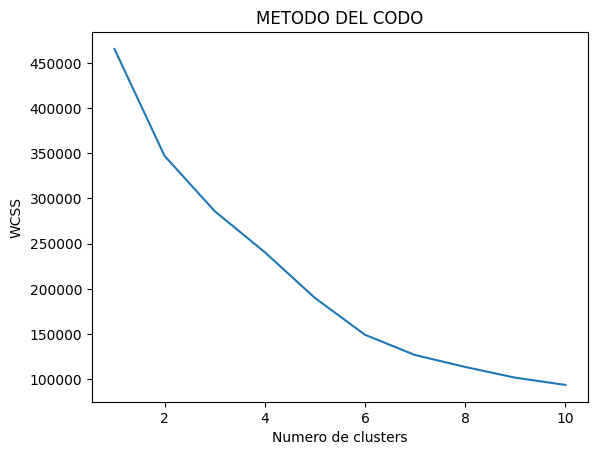

In [40]:
## Visualizacion Regla del Codo para # de Cluster
plt.plot(range(1,11), wcss)
plt.title('METODO DEL CODO')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
# Calculo de los cluster
clustering = KMeans(n_clusters=7, n_init = 10, max_iter=300)
clustering.fit_predict(df_std)
labels = clustering.labels_

In [42]:
from sklearn import metrics

## Metrica Distancia Euclidiana o Silhouette
silhouette = metrics.silhouette_score(df_std, labels, metric='euclidean')
print(silhouette)

0.5378617680515829


In [43]:
## Metrica Davies Boudin

dbs = metrics.davies_bouldin_score(X_std, labels)
print(dbs)

0.8592384231338147


In [44]:
## Metrica Calinski-Harabasz

calinski = metrics.calinski_harabasz_score(X_std, labels)
print(calinski)

20761.437573699986


### Variacion del numero de cluster

In [45]:
## Validacion de metricas para el numero de cluster

scores = []
for k in range(2, 11):
  score = {}
  clustering = KMeans(n_clusters=k, n_init = 10, max_iter=300)
  y_predict = clustering.fit_predict(df_std)
  labels = clustering.labels_
  score ["N_clusters"] = k
  score["silhouette"] = metrics.silhouette_score(df_std, labels, metric='euclidean')
  score["Davies Boudin"] = metrics.davies_bouldin_score(df_std, labels)
  score["Calinski-Harabasz"] = metrics.calinski_harabasz_score(df_std, labels)
  scores.append(score)
table_Vd = pd.DataFrame(scores)
table_Vd

,N_clusters,silhouette,Davies Boudin,Calinski-Harabasz
0,2,0.302670,1.568619,15882.471338
1,3,0.332063,1.416627,14616.277375
2,4,0.377667,1.176257,15842.517976
3,5,0.434803,1.011091,16891.500796
4,6,0.478975,0.916524,19763.255880
5,7,0.537858,0.859234,20761.437327
6,8,0.565490,0.853108,20636.303235
7,9,0.581963,0.888070,20851.678384
8,10,0.594978,0.907025,20695.325603


### Evaluacion de La estructura de los Clusters

In [46]:
## Validacion de metricas para el numero de cluster con Aleotoriedad
random_data = np.random.rand(46561, 10)

scores = []
for k in range(2, 11):
  score = {}
  clustering = KMeans(n_clusters=k, n_init = 10, max_iter=300)
  y_predict = clustering.fit_predict(random_data)
  labels = clustering.labels_
  score ["N_clusters"] = k
  score["silhouette"] = metrics.silhouette_score(random_data, labels, metric='euclidean')
  score["Davies Boudin"] = metrics.davies_bouldin_score(random_data, labels)
  score["Calinski-Harabasz"] = metrics.calinski_harabasz_score(random_data, labels)
  scores.append(score)
random_table = pd.DataFrame(scores)
random_table

,N_clusters,silhouette,Davies Boudin,Calinski-Harabasz
0,2,0.075464,3.448671,3827.686962
1,3,0.064520,3.080150,3223.590801
2,4,0.065266,2.988197,2922.038658
3,5,0.064455,2.676839,2660.811710
4,6,0.064086,2.546888,2472.090507
5,7,0.065274,2.417678,2328.110626
6,8,0.066146,2.330442,2205.762909
7,9,0.066686,2.228847,2115.674471
8,10,0.067145,2.161909,2025.046047


### Evaluacion de la estabilidad de los Clusters

In [47]:
## Validacion de la Estabilidad del modelo
set1, set2, set3,set4 = np.array_split(df_std, 4)
sets = [set1,set2,set3,set4]

scores = []

for set_ in sets:
  score = {}
  n=1
  clustering = KMeans(n_clusters=k, n_init = 10, max_iter=300)
  y_predict = clustering.fit_predict(set_)
  labels = clustering.labels_
  score ["Set"] = f"set {n}"
  n+=1
  score["silhouette"] = metrics.silhouette_score(set_, labels, metric='euclidean')
  score["Davies Boudin"] = metrics.davies_bouldin_score(set_, labels)
  score["Calinski-Harabasz"] = metrics.calinski_harabasz_score(set_, labels)
  scores.append(score)
estability_table = pd.DataFrame(scores)
estability_table

,Set,silhouette,Davies Boudin,Calinski-Harabasz
0,set 1,0.754668,0.608156,10724.919308
1,set 1,0.744732,0.647718,10449.498746
2,set 1,0.740287,0.681117,10511.265974
3,set 1,0.598241,0.848741,5567.329695


## **Instanciamiento de la mejor estructura de Clusters**

In [48]:
clustering = KMeans(n_clusters=7, n_init = 10, max_iter=300)
clustering.fit_predict(df_std)
labels = clustering.labels_
datos_nuevos['cluster'] = labels
datos_nuevos.head(5)

<ipython-input-48-a9a5a1e40d7d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_nuevos['cluster'] = labels


,pais,estado_civil,numero_hijos,miembro,ingreso_real,cluster
26789,Canadá,Soltero,0.0,Plata,13890,5
26892,Estados Unidos,Casado,1.0,Oro,14728,4
26717,México,Soltero,0.0,Bronce,25863,3
26710,México,Casado,0.0,Plata,17003,6
26694,México,Soltero,0.0,Bronce,23615,3


# **ANALISIS DE CLUSTERS**

In [49]:
df_std['cluster'] = labels
df_std.head()

,numero_hijos,ingreso_real,pais_Canadá,pais_Estados Unidos,pais_México,estado_civil_Casado,estado_civil_Soltero,miembro_Bronce,miembro_Oro,miembro_Plata,cluster
0,-0.651027,-1.361868,3.750121,-1.323445,-0.650061,-0.999979,0.999979,-1.628096,-0.440135,2.820901,5
1,0.111666,-1.341297,-0.266658,0.755604,-0.650061,1.000021,-1.000021,-1.628096,2.272031,-0.354497,4
2,-0.651027,-1.067960,-0.266658,-1.323445,1.538318,-0.999979,0.999979,0.614214,-0.440135,-0.354497,3
3,-0.651027,-1.285451,-0.266658,-1.323445,1.538318,1.000021,-1.000021,-1.628096,-0.440135,2.820901,6
4,-0.651027,-1.123143,-0.266658,-1.323445,1.538318,-0.999979,0.999979,0.614214,-0.440135,-0.354497,3


In [50]:
df_std.groupby('cluster').describe()

numero_hijos                                                        \
               count      mean           std       min       25%       50%   
cluster                                                                      
0            13127.0 -0.651027  1.110265e-16 -0.651027 -0.651027 -0.651027   
1             4266.0  0.206779  7.225312e-01 -0.651027 -0.651027  0.111666   
2             9297.0  0.170650  7.121783e-01 -0.651027 -0.651027  0.111666   
3             6316.0 -0.651027  1.110311e-16 -0.651027 -0.651027 -0.651027   
4             5791.0  1.773101  8.966637e-01 -0.651027  1.637052  1.637052   
5             3051.0 -0.065821  8.845831e-01 -0.651027 -0.651027 -0.651027   
6             4713.0  0.025897  1.096117e+00 -0.651027 -0.651027 -0.651027   

                            ingreso_real            ... miembro_Oro            \
              75%       max        count      mean  ...         75%       max   
cluster                                             ...                         
0       -0.651027 -0.651027      13127.0 -0.096694  ...   -0.440135  2.272031   
1        0.874359  3.162437       4266.0 -0.060157  ...   -0.440135 -0.440135   
2        0.874359  3.162437       9297.0 -0.100795  ...   -0.440135 -0.440135   
3       -0.651027 -0.651027       6316.0 -0.150436  ...   -0.440135  2.272031   
4        2.399745  3.162437       5791.0  0.216976  ...    2.272031  2.272031   
5        0.111666  3.162437       3051.0 -0.038479  ...   -0.440135  2.272031   
6        0.111666  3.162437       4713.0  0.482507  ...   -0.440135 -0.440135   

        miembro_Plata                                                        \
                count      mean           std       min       25%       50%   
cluster                                                                       
0             13127.0 -0.354497  0.000000e+00 -0.354497 -0.354497 -0.354497   
1              4266.0 -0.354497  0.000000e+00 -0.354497 -0.354497 -0.354497   
2              9297.0 -0.354497  0.000000e+00 -0.354497 -0.354497 -0.354497   
3              6316.0 -0.354497  1.110311e-16 -0.354497 -0.354497 -0.354497   
4              5791.0 -0.354497  0.000000e+00 -0.354497 -0.354497 -0.354497   
5              3051.0  0.150278  1.161252e+00 -0.354497 -0.354497 -0.354497   
6              4713.0  2.820901  0.000000e+00  2.820901  2.820901  2.820901   

                             
              75%       max  
cluster                      
0       -0.354497 -0.354497  
1       -0.354497 -0.354497  
2       -0.354497 -0.354497  
3       -0.354497 -0.354497  
4       -0.354497 -0.354497  
5       -0.354497  2.820901  
6        2.820901  2.820901  

[7 rows x 80 columns]

In [51]:
clustering.cluster_centers_

array([[-0.65102693, -0.09669359, -0.26665804,  0.75560369, -0.65006052,
        -0.99997852,  0.99997852,  0.45723372, -0.25026062, -0.35449664],
       [ 0.20677905, -0.06015651, -0.26665804, -1.32344509,  1.53831832,
         1.00002148, -1.00002148,  0.61421425, -0.44013493, -0.35449664],
       [ 0.17065013, -0.10079489, -0.26665804,  0.75560369, -0.65006052,
         1.00002148, -1.00002148,  0.61421425, -0.44013493, -0.35449664],
       [-0.65102693, -0.15043574, -0.26665804, -1.32344509,  1.53831832,
        -0.99997852,  0.99997852,  0.44593445, -0.23659369, -0.35449664],
       [ 1.77310099,  0.21697609, -0.23891306,  0.04547444,  0.08229628,
         1.00002148, -1.00002148, -1.62809638,  2.27203055, -0.35449664],
       [-0.06582078, -0.03847897,  3.75012132, -1.32344509, -0.65006052,
         0.03902508, -0.03902508, -0.01563177, -0.10944808,  0.15027817],
       [ 0.02589737,  0.48250744, -0.26665804,  0.1772814 , -0.04132624,
        -0.00655607,  0.00655607, -1.62809638

In [52]:
# prompt: Genera un dataFrame llamado c
columnas_df_std = df_std.columns.tolist()
columnas_df_std.remove('cluster')
centroides = pd.DataFrame(clustering.cluster_centers_, columns=columnas_df_std)
round(centroides.var(),3).sort_values(ascending=False)

pais_Canadá             2.300
miembro_Plata           1.401
miembro_Bronce          1.046
miembro_Oro             0.976
pais_México             0.969
pais_Estados Unidos     0.953
estado_civil_Casado     0.808
estado_civil_Soltero    0.808
numero_hijos            0.663
ingreso_real            0.053
dtype: float64

In [53]:
# Analisis de componentes principales

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_df = pca.fit_transform(df_std)
pca_df_std = pd.DataFrame(data=pca_df, columns=['PC1', 'PC2'])
pca_CP = pd.concat([pca_df_std, df_std['cluster']], axis=1).sort_values("cluster")

pca_CP.head()


,PC1,PC2,cluster
19644,-2.981612,0.264248,0
19270,-2.969597,0.269582,0
19269,-2.976964,0.266312,0
19260,-2.993540,0.258954,0
19255,-2.989231,0.260867,0


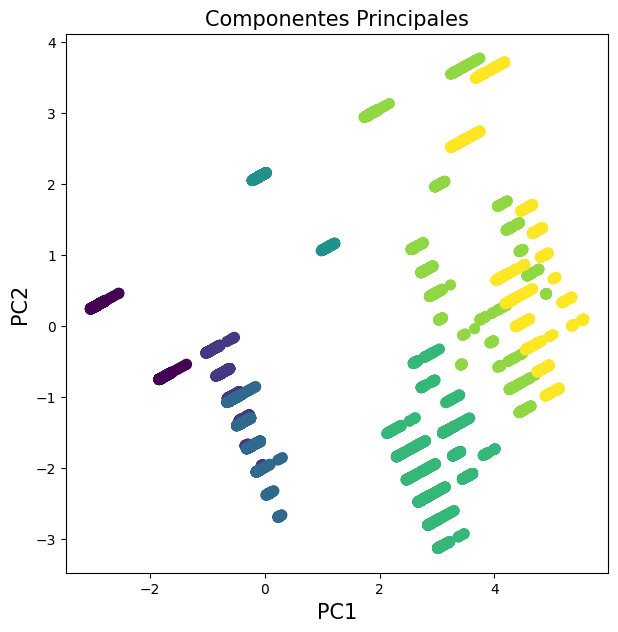

In [54]:
# Grafico de Componenetes principales

# Creacion de Grafico

plt.figure(figsize=(7, 7))
plt.xlabel('PC1', fontsize=15)
plt.ylabel('PC2', fontsize=15)
plt.title('Componentes Principales',fontsize=15)
plt.scatter(x=pca_CP.PC1, y=pca_CP.PC2, c=pca_CP.cluster, s=50, cmap='viridis')

plt.show()

# **ANALISIS RESULTADOS DE CLUSTERIZACION**

In [79]:
# Función para analizar clústers
def analizar_cluster(datos, id_cluster):

    # Cuenta la distribución del estado civil por cluster
    cant_estado_civil = datos_nuevos.query(f"cluster == {id_cluster}")["estado_civil"].value_counts().idxmax()

    # Calcula de las ventas promedio por cluster
    cant_pais = round(datos_nuevos.query(f"cluster == {id_cluster}")["pais"].value_counts()).idxmax()

    # Calcula el promedio de hijos por cluster
    prom_hijos = round(datos_nuevos.query(f"cluster == {id_cluster}")["numero_hijos"].mean())

    # Cuenta la distribución de miembros por cluster
    cant_miembro = datos_nuevos.query(f"cluster == {id_cluster}")["miembro"].value_counts().idxmax()

    # Calcula el promedio de ingresos por cluster
    prom_ingresos = round(datos_nuevos.query(f"cluster == {id_cluster}")["ingreso_real"].mean())

    # impresion de resultados
    print(f"ANALISIS DE CLUSTER ({id_cluster}):\nSegmento de clientes con estado civil {cant_estado_civil} que compra en {cant_pais}, con un promedio de {prom_hijos} hijos.\nCatalogado como {cant_miembro} y con un promedio de ingresos de {prom_ingresos} dólares al año.")

In [78]:
analizar_cluster(datos_nuevos, 0)

ANALISIS DE CLUSTER (0):
Segmento de clientes con estado civil Soltero que compra en Estados Unidos, con un promedio de 0 hijos.
Catalogado como Bronce y con un promedio de ingresos de 65430 dólares al año.


In [80]:
analizar_cluster(datos_nuevos, 1)

ANALISIS DE CLUSTER (1):
Segmento de clientes con estado civil Casado que compra en México, con un promedio de 1 hijos.
Catalogado como Bronce y con un promedio de ingresos de 66918 dólares al año.


In [81]:
analizar_cluster(datos_nuevos, 2)

ANALISIS DE CLUSTER (2):
Segmento de clientes con estado civil Casado que compra en Estados Unidos, con un promedio de 1 hijos.
Catalogado como Bronce y con un promedio de ingresos de 65263 dólares al año.


In [82]:
analizar_cluster(datos_nuevos, 3)

ANALISIS DE CLUSTER (3):
Segmento de clientes con estado civil Soltero que compra en México, con un promedio de 0 hijos.
Catalogado como Bronce y con un promedio de ingresos de 63240 dólares al año.


In [83]:
analizar_cluster(datos_nuevos, 4)

ANALISIS DE CLUSTER (4):
Segmento de clientes con estado civil Casado que compra en Estados Unidos, con un promedio de 3 hijos.
Catalogado como Oro y con un promedio de ingresos de 78208 dólares al año.


In [84]:
analizar_cluster(datos_nuevos, 5)

ANALISIS DE CLUSTER (5):
Segmento de clientes con estado civil Casado que compra en Canadá, con un promedio de 1 hijos.
Catalogado como Bronce y con un promedio de ingresos de 67801 dólares al año.


In [85]:
analizar_cluster(datos_nuevos, 6)

ANALISIS DE CLUSTER (6):
Segmento de clientes con estado civil Soltero que compra en Estados Unidos, con un promedio de 1 hijos.
Catalogado como Plata y con un promedio de ingresos de 89025 dólares al año.
